# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

<h3> STUDENT RESPONSE </h3>
<h2>Question:</h2>

<p>
What was the price elasticity of demand for housing during the recession? 
Compare university and non-university towns. 

</p> 


<p>$$E=\frac{\Delta Q}{\Delta P}$$</p>

<br>
<br>

<p> Ann Arbor, MI is included in university towns. </p> 

In [43]:
import pandas as pd
import pprint as pp
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt
import requests 
import re
import matplotlib.pyplot as plt
from ipywidgets import *
import pandas as pd
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib as mpl

import recession_stats
import university_towns 
import quarterly_pricing_data

 # Package and modules for importing data; this code may change depending on pandas version
import datetime

from IPython.display import display
mpl.get_backend()
%matplotlib inline


https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States

https://en.wikipedia.org/wiki/Category:Non-profit_organizations_based_in_the_United_States_by_city

https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [44]:
# Use this dictionary to map state names to two letter acronyms

states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}


In [45]:
# u_towns is a list of university towns 

In [46]:

def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    
    
    
    data = pd.read_csv('City_Zhvi_AllHomes.csv')
    
    cols = data.loc[:, '2010-01' : '2016-08']
    df = data.loc[:, 'RegionID': 'SizeRank']
    df = df.reset_index()
    mcols = cols
    
    mcols = mcols.groupby(pd.PeriodIndex(mcols.columns,freq='q'),axis=1).mean()
    
    mcolsi = mcols[:0]
    
    lst = list(mcolsi)

    # This seems like a really lengthy way to go about 
    # changing the 2000Q1 to 2000q1 Q from upper to lower case
    q = []
    Q = []
    for line in lst:
        q.append(str(line).lower())
        Q.append(str(line))

    c = dict(list(zip(Q,q)))
    
    mcols.columns = mcols.columns.to_series().astype(str)
    mcols.columns = mcols.columns.str.replace("Q",'q')
    mcols = mcols.reset_index()
#     return type(mcols.columns)


    answer = pd.merge(df, mcols, how='outer', on='index')
    answer['State'] = answer['State'].replace(states).astype(str)
    answer = answer.set_index([answer['State'], answer['RegionName']])
    answer = answer.drop('index', axis=1)
#     answer = answer.drop('State', axis=1),
#     answer = answer.drop('RegionName', axis=1)
    answer = answer.drop(['RegionName','Metro', 'State', 'RegionID','CountyName','SizeRank'],axis=1)
     
    
    df = answer
    
    
    return df



In [47]:

def convert_inventory_data_to_quarters(file):
    '''Converts monthly housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    
    df = pd.read_csv(file)
    
    # Remove extraneous columns and rename the remaining columns.
    df = (df.drop(['RegionType'], axis=1)
            .drop(['CountyName'], axis=1)
            .drop(['DataTypeDescription'], axis=1)
            .drop(['Metro'], axis=1)
            .rename(columns = {'RegionName': 'County', 'StateFullName': 'State'})
         )
    # 
    cols = df.loc[:, '2010-01': '2016-08']
    
    cols = cols.groupby(pd.PeriodIndex(cols.columns,freq='q'), axis=1).mean()
    
    # change upper to lower case Q
    cols_i = cols[:0]
    
    cols_lst = list(cols_i)
    
    q = []
    Q = []
    
    for line in cols_lst:
        q.append(str(line).lower())
        Q.append(str(line))
    c = dict(list(zip(Q,q)))
    
    cols.columns = cols.columns.to_series().astype(str)
    cols.columns = cols.columns.str.replace("Q", "q")
    
    # get the two dataframes ready to merge on the common index 
    cols = cols.reset_index()
    df = df.reset_index()
    df = df.loc[:,'index':'State']

    df = pd.merge(df, cols, how='inner', on='index')
    df = df.set_index(['State','County']).sort_index()
    df = df.drop(['index'], axis=1)
    
    return df
                # returns dataframe

In [48]:
# Take quarterly data and assign to variable to put into pct change 

prices = convert_housing_data_to_quarters()
inventory = convert_inventory_data_to_quarters('InventoryMeasure_County_Public.csv')

In [49]:

def get_percent_change_housing_quantity(inventory):
    
    dQ = inventory
    
     # get percent change in quantity (inventory)
    dQ = (dQ.pct_change()
            .sort_index()
            .dropna()
            .reset_index()
         )
  
    return dQ

  # returns dataframe

In [50]:

def get_percent_change_housing_price(prices):
    
    dP = prices
    
    dP =( dP.pct_change()
            .sort_index()
            .dropna()
            .reset_index()
            .rename(columns = {'RegionName': 'County'})
        )
    
    return dP 

  # returns dataframe

In [51]:
def get_dfa(*args):

    # Create Container for Prices & Quantities 

    # use the methods to retrieve the dataframes 
    dP = get_percent_change_housing_price(prices) 
    dQ = get_percent_change_housing_quantity(inventory) 

    # dPQ is a dictionary that contains two pandas dataframes, 
    # 'prices' and 'quantities'. 

    dPQ = {'prices': dP, 'quantities': dQ}

    dP['a'] = list(zip(dP['State'], dP['County']))

    dQ['a'] = list(zip(dQ['State'], dQ['County']))

    # set up lists of state, county name pairs for both the prices & 
    # quantities dataframes 

    PQ = pd.merge(dQ,dP,how='inner',on='a')

    a = list(PQ['a'])

    PQ = PQ.set_index(PQ['a'])

    df_out = PQ.groupby(by=PQ.columns.str.extract('(\d{4}q\d)', expand=False),axis=1).apply(lambda x: x.iloc[:,0].div(x.iloc[:,1]))

    df = df_out.reset_index()

    df= (df.assign(State=lambda df: df.a[:])
           .assign(County=lambda df: df.a[:])
        )
    i=0
    j = []
    k=[]
    for i in range(0,292):
        n = a[i:i+1][0]
        j.append(n[0])
        k.append(n[1])

    df_out['State'] = j
    df_out['County'] = k

    df_out = df_out.set_index(['State', 'County'])


 
    return df_out

dfa = get_dfa()
dfa.head()

2010q1     2010q2      2010q3      2010q4      2011q1  \
State   County                                                                 
Alabama Madison    -56.947905 -75.713193 -121.873198 -139.590996 -128.900548   
        Mobile      -8.855449  -7.398064   -9.292042   -8.298578  -10.067728   
        Shelby      -9.931575 -11.899467    8.811496    7.025320    4.914496   
        Tuscaloosa   3.128542   2.064628    2.254021    2.450674    2.251885   
Alaska  Anchorage    3.817869   4.354364    4.059498    3.012810    1.873585   

                        2011q2      2011q3      2011q4      2012q1  \
State   County                                                       
Alabama Madison    -149.881439 -200.980853 -164.005757 -148.903821   
        Mobile      -12.362575  -12.444943  -12.385522   -8.082528   
        Shelby        5.626099    5.412563    4.879603    3.139573   
        Tuscaloosa    1.402633    0.793629    0.809041    0.729354   
Alaska  Anchorage     2.365254    3.656007    2.804705    1.928872   

                        2012q2    ...          2014q2      2014q3      2014q4  \
State   County                    ...                                           
Alabama Madison    -175.721559    ...     -137.464985 -148.413740 -156.427656   
        Mobile       -5.287034    ...       -3.064882   -2.668739   -2.638293   
        Shelby        3.020245    ...        7.298516    5.820703    4.542809   
        Tuscaloosa    1.013084    ...        3.753063    4.689308    4.794884   
Alaska  Anchorage     1.833262    ...        0.508817    0.998758    0.445975   

                        2015q1      2015q2      2015q3     2015q4     2016q1  \
State   County                                                                 
Alabama Madison    -116.657613 -123.826719 -100.521302 -81.663785 -77.231147   
        Mobile       -2.406503   -4.809346   -4.755648  -5.140016  -5.039308   
        Shelby        4.584363    8.035592    8.090162   9.695278   9.812598   
        Tuscaloosa    4.979948    8.518959    9.155891  11.077942  12.772182   
Alaska  Anchorage    -0.132801    0.710448    1.365840   1.192751   1.639999   

                       2016q2     2016q3  
State   County                            
Alabama Madison    -79.354553 -89.546575  
        Mobile      -4.242316  -4.195817  
        Shelby      13.865665  13.357974  
        Tuscaloosa  46.156271 -39.245686  
Alaska  Anchorage    2.341916   2.930437  

[5 rows x 27 columns]

In [52]:
plt.figure()

In [53]:



def get_f():
    dfa = get_dfa()
    f = pd.read_csv('us_regions.csv')
    print(f.columns) # just to display the values 
#     print(dfa.columns)
    dfa = dfa.reset_index()
    f = f.sort_values('State') 
    f = f.reset_index()
    f = f.sort_values('State')
    f = f.merge(dfa, on='State')
#     f = (f.drop(['index_x'],axis=1)
#         .drop(['index_y'], axis=1))
    f = f.drop(['index'],axis=1)
    return f

f = get_f()
f.head()

df= f.set_index(['Region', 'Division', 'State', 'County'])

Index(['Region', 'Division', 'State'], dtype='object')


<h3> Added later </h3>

In [54]:
# Need to add the date information to the grid. 
from pandas import Series, DataFrame, Panel

<h2> GRAPHING BELOW </h2> 


In [55]:
df.groupby(level='Region').mean()

,2010q1,2010q2,2010q3,2010q4,2011q1,2011q2,2011q3,2011q4,2012q1,2012q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,-34.780902,-19.499339,-26.959892,-16.390964,-21.782264,-15.809879,-35.062582,-10.383487,-23.738014,-49.237373,...,-2.956145,-5.356840,-11.096159,-4.435670,-8.514546,4.847406,-10.645961,-6.364540,-4.827135,-4.745687
Northeast,-0.125152,-1.171520,-1.086008,-1.614858,-1.254210,-0.759060,-1.560825,-9.251870,-2.355740,-2.582790,...,-2.171306,0.718163,-0.473526,7.031237,-1.581989,-2.896807,-1.781881,-2.787157,-2.314750,0.049066
South,-22.709010,-41.745389,-35.756914,-33.872770,-31.894935,-28.328085,-27.363417,-19.422108,-21.608397,-23.564722,...,-14.512971,-14.528208,-14.890574,-12.409789,-9.846964,-12.146173,-13.460472,-11.012577,-14.937699,-11.228807
West,-45.996223,-80.488046,237.182048,20.027021,10.667987,48.641565,-488.976569,-138.869222,446.303002,98.719730,...,-90.343808,-137.364439,-368.472914,420.409197,467.904891,-387.005117,-243.990767,-49.288287,-248.024779,-93.609543


In [56]:
REGION_MEANS = df.groupby(level='Region').mean()


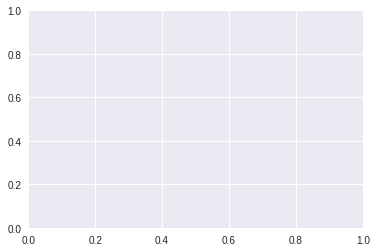

In [57]:
plt.subplot(111)
REGION_MEANS.plot.hist 
plt.gca()


In [58]:
# sns.pairplot(REGION_MEANS)

In [60]:
# df.groupby(level='State').sum().unstack(level=0).plot(kind='bar',subplots=True)

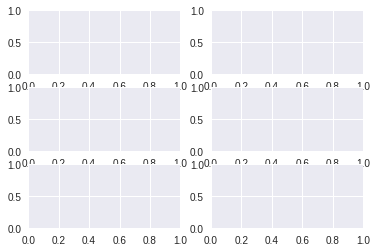

In [61]:
g, a = plt.subplots(3,2)


In [72]:
plt.figure()
df.columns    

cols = df.loc[:, '2010-01' : '2016-08']
cols    
cols = cols.groupby(pd.PeriodIndex(cols.columns,freq='A'),axis=1).mean()
# cols = cols.reset_index()
cols

2010  \
Region  Division           State      County                         
South   East South Central Alabama    Madison           -98.531323   
                                      Mobile             -8.461033   
                                      Shelby             -1.498556   
                                      Tuscaloosa          2.474466   
West    Pacific            Alaska     Anchorage           3.811135   
                                      Juneau            -79.903103   
        Mountain           Arizona    Maricopa         -394.023836   
                                      Pima               11.165677   
                                      Yuma               -0.571433   
South   West South Central Arkansas   Benton            -50.898081   
                                      Johnson             1.297336   
                                      Scott              -3.405155   
                                      Van Buren           2.119926   
West    Pacific            California Alameda            14.251355   
                                      El Dorado          -0.693833   
                                      Fresno             -6.953632   
                                      Imperial           -0.205002   
                                      Los Angeles     -1299.029494   
                                      Madera              2.205230   
                                      Mariposa           -0.413342   
                                      Mendocino          -1.144477   
                                      Merced             -1.473965   
                                      Napa               -0.007455   
                                      Orange             22.911797   
                                      Riverside           5.599799   
                                      Sacramento         -5.551464   
                                      San Bernardino   4465.431301   
                                      San Diego           0.198166   
                                      San Luis Obispo    -0.212518   
                                      San Mateo           0.027746   
...                                                            ...   
South   South Atlantic     Virginia   Henrico            10.859079   
                                      Henry              12.224511   
                                      King George        -3.592379   
                                      New Kent           -0.872320   
                                      Orange            -24.656556   
                                      Richmond           -0.166348   
                                      Roanoke            -1.217690   
                                      Spotsylvania      -11.460999   
                                      Stafford           -0.443834   
West    Pacific            Washington Chelan             -0.238661   
                                      Pacific             1.866855   
                                      Snohomish          52.384582   
                                      Spokane             1.175945   
                                      Walla Walla        12.352393   
                                      Yakima            -26.311008   
Midwest East North Central Wisconsin  Dunn               -0.167738   
                                      Eau Claire         -2.751451   
                                      Fond du Lac        -0.290170   
                                      Kenosha           -51.142989   
                                      La Crosse          21.567021   
                                      Lafayette         -11.200202   
                                      Manitowoc          -2.396281   
                                      Milwaukee        -487.656739   
                                      Oneida              1.795892   
                                      Polk                3.018676   
  

In [73]:
import bokeh
# from bokeh.charts import Scatter, output_file, show
# from bokeh.sampledata.autompg import autompg as df

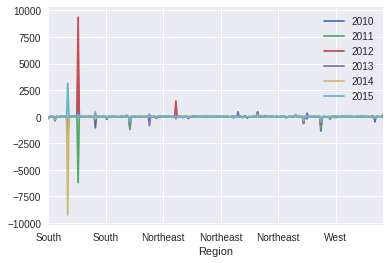

In [83]:
# ax = Scatter(df, x="displ", y='hp', marker='cyl', color='cyl', title="sh", legend="top_left", xlabel="asdf", ylabel="asdfdf")
# show(ax)
cols.reset_index().plot(x='Region', y=cols.columns, use_index=True)

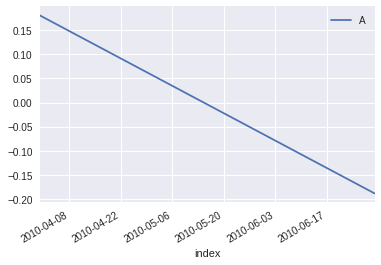

In [87]:
# ax = sns.swarmplot(x="Division", y=pd.PeriodIndex(cols.columns, freq='A', axis=1).mean(), data=df)


dates = pd.date_range('2010-01-01', periods=100)

df = pd.DataFrame(np.random.randn(100,1), index=dates, columns=['A'])

monthly_mean = df.resample('Q').mean()

monthly_mean.reset_index().plot(x='index', y='A')

In [ ]:
df2 = df


In [ ]:
df2 = df2.reset_index()

In [ ]:
df2

In [ ]:
ax = sns.swarmplot(x="Division", y=("2012q4"), data=df2)
plt.xticks(rotation=45)
ax.set(ylabel='Price Elasticity of Demand', title='Price Elasticity of Demand for Housing, United States 2012, 4th quarter')

In [ ]:
ax = sns.factorplot(x="Region", y="2012q4", data=df2, kind='bar')
ax.set(ylabel='Price Elasticity of Demand', title='Price Elasticity of Demand for Housing, United States 2012 fourth quarter')

In [ ]:
g = sns.PairGrid(df2, x_vars=["Region"],
                y_vars=["2010q1", "2010q2", "2010q3", "2010q4"],
                aspect=1.25, size=4.5)
g.map(sns.violinplot, palette="muted")

In [ ]:
sns.factorplot(x="Division", y="2016q1", hue="Region", col="Region", data=df2,kind='box', size=8, aspect=.5)

,Region,Division,State,County,2010q1,2010q2,2010q3,2010q4,2011q1,2011q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
0,South,East South Central,Alabama,Madison,-56.947905,-75.713193,-121.873198,-139.590996,-128.900548,-149.881439,...,-137.464985,-148.413740,-156.427656,-116.657613,-123.826719,-100.521302,-81.663785,-77.231147,-79.354553,-89.546575
1,South,East South Central,Alabama,Mobile,-8.855449,-7.398064,-9.292042,-8.298578,-10.067728,-12.362575,...,-3.064882,-2.668739,-2.638293,-2.406503,-4.809346,-4.755648,-5.140016,-5.039308,-4.242316,-4.195817
2,South,East South Central,Alabama,Shelby,-9.931575,-11.899467,8.811496,7.025320,4.914496,5.626099,...,7.298516,5.820703,4.542809,4.584363,8.035592,8.090162,9.695278,9.812598,13.865665,13.357974
3,South,East South Central,Alabama,Tuscaloosa,3.128542,2.064628,2.254021,2.450674,2.251885,1.402633,...,3.753063,4.689308,4.794884,4.979948,8.518959,9.155891,11.077942,12.772182,46.156271,-39.245686
4,West,Pacific,Alaska,Anchorage,3.817869,4.354364,4.059498,3.012810,1.873585,2.365254,...,0.508817,0.998758,0.445975,-0.132801,0.710448,1.365840,1.192751,1.639999,2.341916,2.930437
5,West,Pacific,Alaska,Juneau,10.028054,22.631513,-293.386263,-58.885717,-62.493567,-67.591398,...,-5.870673,-6.243605,-5.525948,-5.383427,-5.189534,-6.598693,-8.850385,-12.012418,-11.540184,-15.808546
6,West,Mountain,Arizona,Maricopa,-308.653008,-341.806462,-417.903396,-507.732478,-474.087145,-413.985847,...,-254.495382,-262.539660,-210.687537,-175.016825,-177.865166,-160.940165,-165.257831,-144.662065,-159.720420,-168.096362
7,West,Mountain,Arizona,Pima,10.111866,10.645026,10.557778,13.348038,13.228636,11.518696,...,6.947254,3.331953,4.769326,6.486851,5.286504,4.707704,6.956702,7.792887,4.927283,3.760521
8,West,Mountain,Arizona,Yuma,-0.504529,-0.561307,-0.623754,-0.596144,-0.543804,-0.583525,...,-0.467429,-0.471365,-0.418636,-0.387299,-0.452998,-0.441390,-0.400692,-0.375635,-0.409087,-0.383697
9,South,West South Central,Arkansas,Benton,-30.193420,-35.077601,-66.710413,-71.610891,-69.913841,-58.034434,...,-14.798523,-12.604911,-12.696185,-10.493276,-5.308833,-11.115745,-11.506224,-10.334239,-8.134583,-8.692725


/home/generic/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


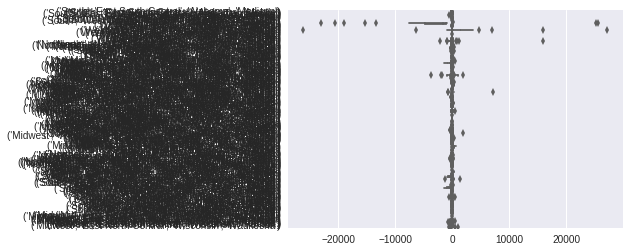

In [589]:
ax = sns.boxplot(data=df2, orient="h", palette="Set3")

/home/generic/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


ValueError: Could not interpret input 'State'

In [471]:
fig = plt.figure(figsize=(12,12))

In [472]:
n = 1

In [473]:
# def get_regions():
#     f = f.reset_index()
#     regions = list(f.Region.unique())
#     print(type(regions))
#     return regions 
# # f.reset_index()
# get_regions()

In [474]:
num_precols = 0 #how many columns prepend and append?
num_obj_fn = 1 #objective function columns appended to the end

In [475]:
num_dims = df.shape[1] - num_obj_fn

In [482]:
headers = list(df.columns.values)
regions

['South', 'West', 'Northeast', 'Midwest']

In [488]:
regions = list(f.Region.unique())
regions

['South', 'West', 'Northeast', 'Midwest']

In [477]:
print("Our design vector has %s dimensions: %s" % (num_dims,headers[num_precols:-1]))
gridshape = (num_dims, num_dims)
num_plots = num_dims**2
print("our multivariate grid will therefore be of shape", gridshape,"with a total of", num_plots, "plots")
# this is all from academic.bancey.com/plotting-multivariate-d....


Our design vector has 26 dimensions: ['2010q1', '2010q2', '2010q3', '2010q4', '2011q1', '2011q2', '2011q3', '2011q4', '2012q1', '2012q2', '2012q3', '2012q4', '2013q1', '2013q2', '2013q3', '2013q4', '2014q1', '2014q2', '2014q3', '2014q4', '2015q1', '2015q2', '2015q3', '2015q4', '2016q1', '2016q2']
our multivariate grid will therefore be of shape (26, 26) with a total of 676 plots


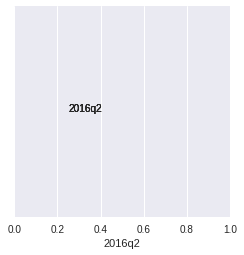

In [526]:
fig = plt.figure(figsize=(120,120))
n =1


axes = [[False for i in range(num_dims)] for j in range(num_dims)]

for j in range(num_dims):
    ax = fig.add_subplot(num_dims,num_dims,n)
    for i in range(num_dims):
        ax = fig.add_subplot(num_dims,num_dims,n)

colors = ['red','green','blue']    

for index, s in enumerate(regions):
    if i !=j: 
        ax.scatter(f.where(f['Region'] == s).ix[:,i], f.where(f['Region']==s).ix[:,j], color=colors[index],label=s)
    else:
        ax.text(0.25, 0.5, headers[i])
        pass

ax.set_xlabel(headers[i])
ax.set_ylabel(headers[j])

if j < num_dims - 1:
    ax.xaxis.set_visible(False) 

if i > 0:
    ax.yaxis.set_visible(False)

if i == 1 and j == 0:
    ax.legend(bbox_to_anchor=(3.5, 1),loc=2, borderaxespad=0.,title="Region name:")


    axes[j][i] = ax

    n +=1

    plt.subplots_adjust(left=0.1,right=0.85, top=0.85, bottom=0.1)
plt.show()


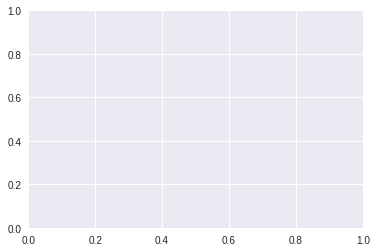

ValueError: object too deep for desired array

In [27]:
p = plt.subplot(111)
p = plt.figure(figsize=(10,20))
a=df_out.groupby(level=0).mean()
# a.plot(kind='bar', subplots=True)
# sns.heatmap(a)
sns.pairplot(df_out)


In [28]:
# df

In [254]:
def get_total_employment():
    df = pd.read_excel('TotalEmployment.xls', skiprows=5)

    #remove (Metropolitan Statistical Area)
    df['GeoName'] = df['GeoName'].str.replace(r"(\(.{1,30})", "")

    df = df.drop(['GeoFips'],axis=1)

    # Drop National Data
    df = df.T
    df = df.drop([0], axis=1)
    df = df.T

    df['County'], df['State'] = df['GeoName'].str.split(',', 1).str
    df = df.set_index(['County'])
    df = ( df.drop(['GeoName'], axis=1)
          .drop(['State'], axis=1)
          .drop_duplicates()
          .dropna()
         )
    
    return df


In [619]:
def get_personal_income():
    
    df = pd.read_excel('USPersonalIncome.xls', skiprows=5)
    return df 

PI = get_personal_income()
# PI.head(20)